# **Procesamiento de Lenguaje Natural (NLP) para Análisis de Sentimientos**

---


En este notebook encontrarás;


*   Exploración y análisis de los datos (EDA)
*   Pre-procesamiento de los datos
*   Construcción de un Modelo de clasificación multiclase con Tensorflow



In [1]:
#Importar la lisbrerías a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import io
import nltk
from wordcloud import WordCloud
from collections import Counter


from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow_hub as hub




In [2]:
df = pd.read_csv("/content/drive/MyDrive/prueba_tecnica/prueba/dataSocialMedia.csv")

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,Unnamed: 0,_id,message,name,id_user,username,id_post,link,date,user_link,weekday,just_emoji,sentiment,reply_screen_name,created_at,owner,shortcode,hour
0,0,63d415fe24f17c7a0a38762a,Lo que tiene que hacer el Miss Venezuela es r...,Lisette Diaz,marazul41,marazul41,718139826350485,http://www.facebook.com/MissVenezuelaOficial/p...,2023-01-14,http://www.facebook.com/marazul41,Sabado,False,negativo,MissVenezuelaOficial,0.0,0,0,0
1,1,63d415fe24f17c7a0a38762b,Me imagino que dentro del plan de acción está ...,Kendra Pérez,kendra.pereztabares,kendra.pereztabares,718139826350485,http://www.facebook.com/MissVenezuelaOficial/p...,2023-01-14,http://www.facebook.com/kendra.pereztabares,Sabado,False,negativo,MissVenezuelaOficial,0.0,0,0,0
2,2,63d415fe24f17c7a0a38762c,"No, esta el de seleccionar lo mejor para la or...",Karen Isabel,karen.isabel.5,karen.isabel.5,718139826350485,http://www.facebook.com/MissVenezuelaOficial/p...,2023-01-14,http://www.facebook.com/karen.isabel.5,Sabado,False,negativo,MissVenezuelaOficial,0.0,0,0,0
3,3,63d415fe24f17c7a0a38762d,Hermosas 🌠💕,Mariaida Medina,MARIAIDA.MEDINA,MARIAIDA.MEDINA,718139826350485,http://www.facebook.com/MissVenezuelaOficial/p...,2023-01-14,http://www.facebook.com/MARIAIDA.MEDINA,Sabado,False,positivo,MissVenezuelaOficial,0.0,0,0,0
4,4,63d415fe24f17c7a0a38762e,Nada! Ando enojada! Que clase de robo y super ...,Mariam Sequera,mariam.sequera.3,mariam.sequera.3,718139826350485,http://www.facebook.com/MissVenezuelaOficial/p...,2023-01-14,http://www.facebook.com/mariam.sequera.3,Sabado,False,negativo,MissVenezuelaOficial,0.0,0,0,0


## Observación de la información general de los datos

In [4]:

df.shape

(22374, 18)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22374 entries, 0 to 22373
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22374 non-null  int64  
 1   _id                22374 non-null  object 
 2   message            22373 non-null  object 
 3   name               22374 non-null  object 
 4   id_user            22374 non-null  object 
 5   username           22374 non-null  object 
 6   id_post            22374 non-null  int64  
 7   link               22374 non-null  object 
 8   date               22374 non-null  object 
 9   user_link          22374 non-null  object 
 10  weekday            22374 non-null  object 
 11  just_emoji         22374 non-null  bool   
 12  sentiment          22374 non-null  object 
 13  reply_screen_name  22374 non-null  object 
 14  created_at         22374 non-null  float64
 15  owner              22374 non-null  object 
 16  shortcode          223

In [6]:
columnas = ['message','sentiment']
df = df[columnas]

In [7]:
#Eliminación del unico dato nulo
print(df.isna().sum())
df = df.dropna()
print(df.isna().sum())

message      1
sentiment    0
dtype: int64
message      0
sentiment    0
dtype: int64


## Visualización de los datos

observación de gráficos para conocer la distribución de los datos

##### Distribución de mensajes por categoría
Este gráfico permite conocer cuales son las clases predominante en los datos, en este caso los datos positivos son mas frecuentes que los neutros y negativos, con una frecuencia del 68%.


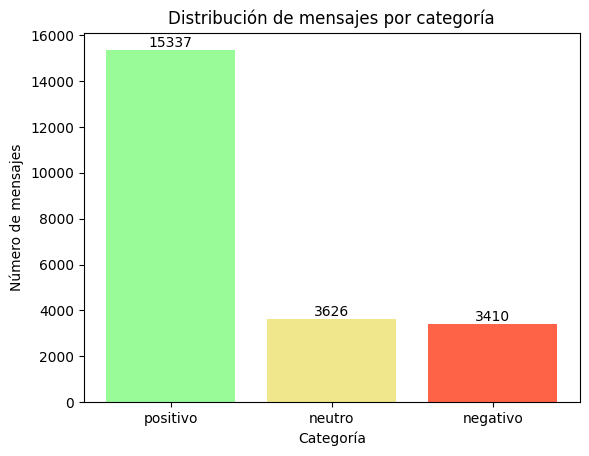

In [8]:
clases = df['sentiment'].value_counts()

# Asignar colores a cada clase
colors = ['palegreen', 'khaki', 'tomato']

plt.bar(clases.index, clases.values, color=colors)
plt.xlabel("Categoría")
plt.ylabel("Número de mensajes")
plt.title("Distribución de mensajes por categoría")

# Agregar etiquetas de texto en cada barra
for i, v in enumerate(clases.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

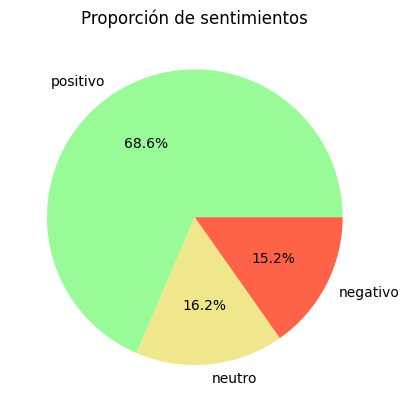

In [9]:
import matplotlib.pyplot as plt

colores = ['palegreen', 'khaki', 'tomato']

clases = df['sentiment'].value_counts()
plt.pie(clases.values, labels=clases.index, autopct='%1.1f%%', colors=colores)


plt.title('Proporción de sentimientos')

plt.show()

##### Relación entre la longitud de los comentarios y el sentimiento
En este grafico se observa que los comentarios neutros tienden a tener menos palabras mientras que los negativos y positivos tienen mayor longitud

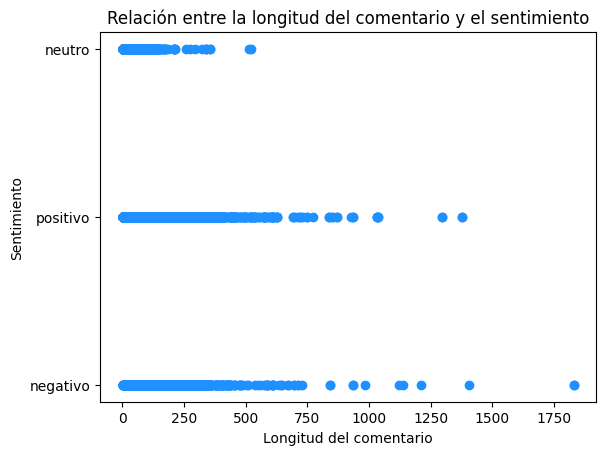

In [10]:
# Crea el gráfico de dispersión

plt.scatter(df['message'].str.len(), df['sentiment'], color='dodgerblue')

# Agrega etiquetas y título
plt.xlabel('Longitud del comentario')
plt.ylabel('Sentimiento')
plt.title('Relación entre la longitud del comentario y el sentimiento')

# Muestra el gráfico
plt.show()

En este gráfico se muestra las distribuciones del texto en relación a su longitud

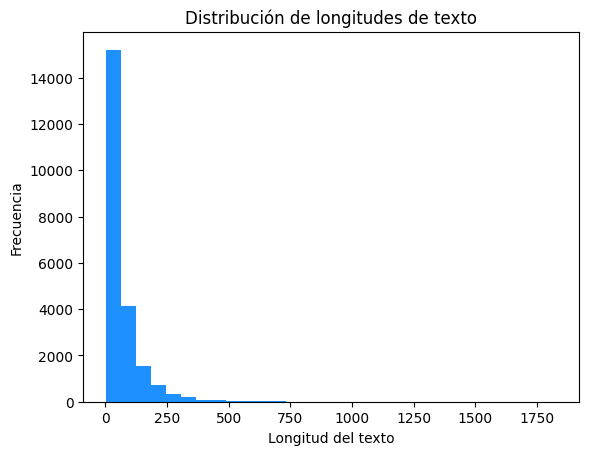

In [11]:

longitudes = df['message'].str.len()


plt.hist(longitudes, bins=30, color='dodgerblue')

# Agrega etiquetas y título
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.title('Distribución de longitudes de texto')

# Muestra el histograma
plt.show()

##### Nube de palabras donde se observa las palabras más frecuentes en el dataset.

Se observa que hay palabras irrelevantes que deben ser eliminadas para mejor comprensión en el anáisis.

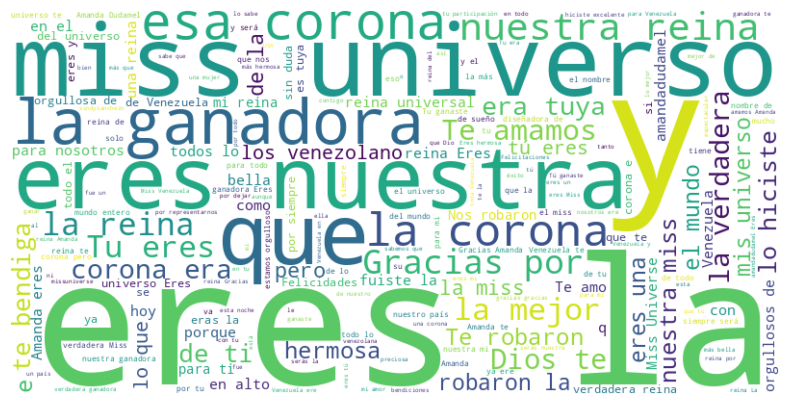

In [12]:

text = ' '.join(df['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

## Pre-procesamiento

---
Los siguientes codigos tienen como objetivo pasar todo el texto a formato común para que las palabras con significados similares se representen de la misma manera y mejorar la calidad de los datos de entrada en el entrenamiento del modelo


In [14]:

# función para eliminar los caracteres no deseados
def clean_text(text):
  """
    Función para Eliminar los signos de puntuación, emoticones, números y otros caracteres no alfabéticos
  """
  cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
  return cleaned_text

# Aplicar la función a la columna "message"
df['message'] = df['message'].apply(clean_text)

In [15]:
# Convertir los textos a minúsculas
df['message'] = df['message'].str.lower()

In [16]:
nltk.download('stopwords')


# Obtener las stop words en español
stop_words = set(stopwords.words('spanish'))

# Función para eliminar las stop words
def remove_stopwords(text):
    # Dividir el texto en palabras
    words = text.split()
    # Filtrar las palabras que no son stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Unir las palabras filtradas nuevamente en un texto
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Aplicar la función a la columna "message"
df['message'] = df['message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Definir una función para eliminar los espacios en blanco innecesarios
def remove_extra_spaces(text):
    # Eliminar los espacios en blanco al principio y al final de la cadena
    text = text.strip()
    # Reemplazar múltiples espacios consecutivos con un solo espacio
    text = re.sub(r'\s+', ' ', text)
    return text

# Aplicar la función a la columna "message"
df['message'] = df['message'].apply(remove_extra_spaces)

In [18]:
label_encoder = LabelEncoder()

# Convertir las etiquetas de texto a valores numéricos
df['label'] = label_encoder.fit_transform(df['sentiment'])

# Mapear los valores numéricos a las etiquetas originales
class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}


print(df.head())

                                             message sentiment  label
0  hacer miss venezuela retirarse miss uni seal p...  negativo      0
1  imagino dentro plan accin est tener sistema vo...  negativo      0
2  seleccionar mejor organizacion tomando cuentas...  negativo      0
3                                           hermosas  positivo      2
4  ando enojada clase robo super descarado tena f...  negativo      0


Observamos de nuevo la nube de palabras ahora sin palabras irrelevantes


---

El gráfico muestra las palabras más frecuentes por categoría. Ejemplo, en el caso de comentarios negativos, se encuentra "robaron" y "fraude", mientras que en los positivos "reina" y "ganadora"

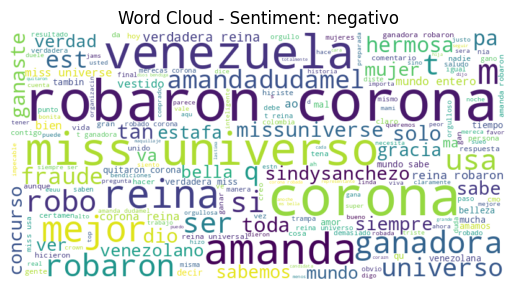

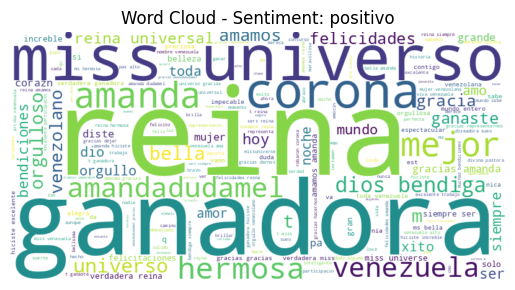

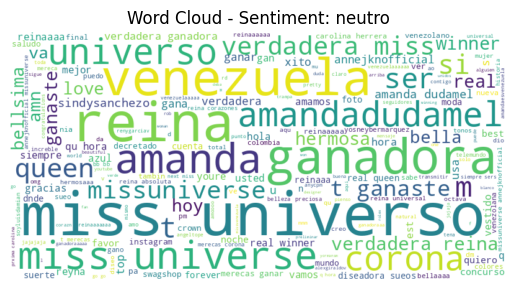

In [19]:
def generate_wordcloud(sentiment):
    # Filtrar los mensajes por el sentimiento específico
    messages = df.loc[df['sentiment'] == sentiment, 'message']
    # Unir todos los mensajes en un solo texto
    text = ' '.join(messages)
    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Mostrar la nube de palabras
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud - Sentiment: " + sentiment)
    plt.show()

# Obtener los diferentes sentimientos
sentiments = df['sentiment'].unique()

# Generar la nube de palabras para cada sentimiento
for sentiment in sentiments:
    generate_wordcloud(sentiment)

Conteo de las palabras más frecuentes

In [20]:
nltk.download('stopwords')

# Obtener las stop words en español
stop_words = set(stopwords.words('spanish'))

# Crear una función para obtener las diez palabras más usadas por sentimiento
def get_top_words(sentiment):
    # Filtrar los mensajes por el sentimiento específico
    messages = df.loc[df['sentiment'] == sentiment, 'message']
    # Unir todos los mensajes en un solo texto
    text = ' '.join(messages)
    # Dividir el texto en palabras
    words = text.split()
    # Filtrar las palabras que son stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Contar la frecuencia de cada palabra
    word_counts = Counter(filtered_words)
    # Obtener las diez palabras más usadas
    top_words = word_counts.most_common(10)
    return top_words

# Obtener los diferentes sentimientos en tu DataFrame
sentiments = df['sentiment'].unique()

# Obtener las diez palabras más usadas por cada sentimiento
for sentiment in sentiments:
    top_words = get_top_words(sentiment)
    print("Sentimiento:", sentiment)
    for word, count in top_words:
        print(word, "-", count)
    print()

Sentimiento: negativo
corona - 1240
robaron - 946
reina - 563
universo - 532
miss - 526
venezuela - 426
amanda - 408
ganadora - 299
t - 288
robo - 283

Sentimiento: positivo
reina - 3568
universo - 2111
amanda - 2097
gracias - 1940
ganadora - 1880
corona - 1767
miss - 1702
venezuela - 1594
dios - 1194
hermosa - 1175

Sentimiento: neutro
miss - 504
universo - 430
reina - 320
venezuela - 224
ganadora - 224
amanda - 169
the - 142
verdadera - 133
universe - 127
t - 117



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Gráfico de loss comentarios más frecuentes.

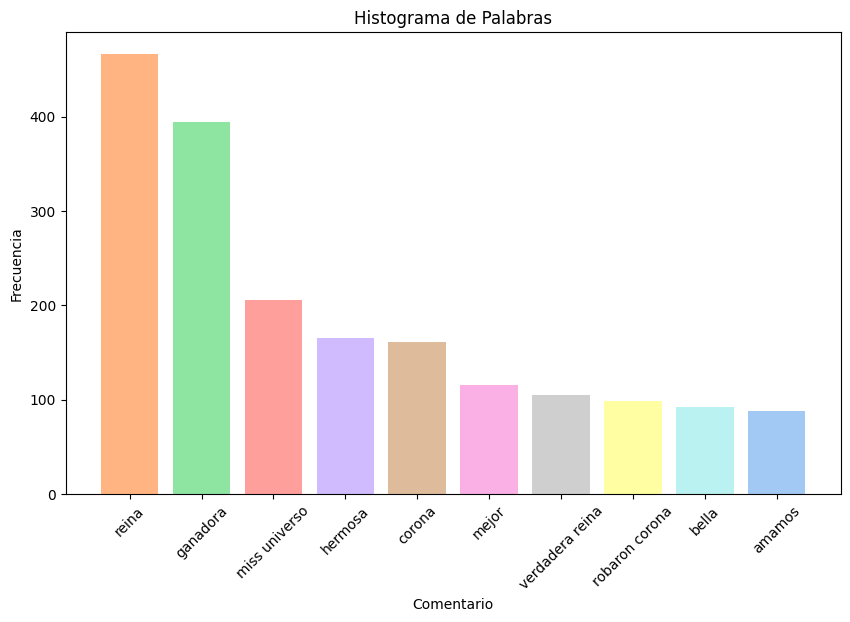

In [21]:
import seaborn as sns

word_counts = df['message'].value_counts().reset_index()
word_counts.columns = ['comentario', 'frecuencia']

# Ordenar las palabras por frecuencia descendente
word_counts = word_counts.sort_values('frecuencia', ascending=False)

# Definir una paleta de colores
colors = sns.color_palette("pastel", len(word_counts))

# Visualizar el histograma de palabras
plt.figure(figsize=(10, 6))
plt.bar(word_counts['comentario'][1:11], word_counts['frecuencia'][1:11], color=colors[1:11])
plt.xlabel('Comentario')
plt.ylabel('Frecuencia')
plt.title('Histograma de Palabras')
plt.xticks(rotation=45)
plt.show()

## Parte II
#### Modelo Final



---
Para la creación de este modelo se siguió la documentación Oficial de Tensorflow, la cual muestra los pasos generales para la construcción de un modelo de clasificación.

En este caso, se utilizó la función df_to_dataset que sirve para transformar un dataframe a tensores y también se utilizón el modelo de transformers de tensorflowHub "/nnlm-es-dim50/2" el cual tiene miles de palabras en español pre-entrenadas que permiten mejorar el la calidad de los datos en datasets con poca diversidad de palabras.



In [22]:
#División de los datos para entrenamiento y prueba

train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])
len(train), len(val), len(test)

(17898, 2237, 2238)

Convertir un Dataframe en un objeto dataset de Tensorfow

Esta funcion se copió de la documentacion de estructura de datos de TensorFlow; https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers?hl=es-419

In [23]:
def df_to_dataset(dataframe, shuffle=True, batch_size=104):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["message"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [24]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

list(train_data)[1]

(<tf.Tensor: shape=(104,), dtype=string, numpy=
 array([b'bamos venezuela si puede', b'reina venezuela sabe',
        b'orgullosa representaste alto gracias amandadudamel', b'robo',
        b'reinaaa', b'amo',
        b'soyluisdamian aj colombia lugar qued vi jajajajjajaja locaaaa mami',
        b'ganadora robo gigante', b'venezolanos robaron',
        b'q ganar realidad ganadora',
        b'impecable hermosa representacin amandadudamel', b'reina',
        b'maravillosa participacin orgullosa', b't verdadera ganadora',
        b'reina', b'solo dios sabe', b'dcima corona venezuela est aqui',
        b'congratulations st runner up', b'acepto resultado m ganaste t',
        b'nica universo merecas gracias poner nombre venezuela alto salve reina',
        b'ganadora amanda venezuela orgullosa dudo sabemos ganadora siempre seras',
        b'corona reina', b'vamos corona',
        b'duadanielap horrible pobre jajaja trampa',
        b'eriannacmf claramente dudo jajajajaja', b'sirtempeh', b''

Crear una capa de embedding con un modelo de texto pre-entrenado llamado "nnlm-es-dim50" Disponible en tensorflow hub.


---
En el sigueinte codigo se carga un modelo de incrustación de texto pre-entrenado de TensorFlow Hub, que divide el texto en palabras individuales (tokens), busca el vector de incrustación de cada palabra en el modelo pre-entrenado y combina los vectores de incrustación de todas las palabras de una manera significativa


In [25]:
embedding = "https://tfhub.dev/google/nnlm-es-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [26]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(104, 50), dtype=float32, numpy=
array([[ 0.01272293,  0.33550423,  0.1459953 , ..., -0.04291348,
        -0.18888335, -0.2224582 ],
       [-0.17168215, -0.05049702,  0.20265752, ...,  0.29333818,
         0.13782679, -0.7357476 ],
       [-0.1392682 ,  0.04644049,  0.16203617, ...,  0.14194247,
        -0.05270043, -0.12691037],
       ...,
       [ 0.09723392,  0.2973538 ,  0.21526788, ...,  0.00674365,
         0.07913662, -0.34124574],
       [-0.27406645,  0.08486553, -0.10153031, ...,  0.34916207,
        -0.09474967, -0.06548162],
       [ 0.21772556,  0.17725596,  0.14626324, ..., -0.33351028,
        -0.02177706, -0.08285025]], dtype=float32)>

El siguiente es un modelo de tensorflow donde se utiliza la activación "softmax" que sirve para la clasificación multiclase.

In [27]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.4)) #Dropout -  técnica de regularización que ayuda a prevenir el sobreajuste
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [28]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

evaluacioón del modelo antes de entrenarlo

In [29]:
model.evaluate(train_data)

173/173 [==============================] - 2s 3ms/step - loss: 1.0812 - accuracy: 0.4062


[1.0811585187911987, 0.40624651312828064]

In [30]:
model.evaluate(valid_data)

22/22 [==============================] - 0s 4ms/step - loss: 1.0806 - accuracy: 0.4139


[1.080562710762024, 0.4139472544193268]

Entrenamiento y evaluación del modelo


*   Tiene un accuracy de 83%
*   Tiene una pérdida del 45%


---

La perdida se refiere a la diferencia entre los datos predichos y los datos reales. Se entiende que tenga una perdida relativamente alta debido al desequilibrio en la proporción de las clases







In [38]:
history = model.fit(train_data, epochs=4, validation_data=valid_data)

Epoch 1/4
173/173 [==============================] - 268s 2s/step - loss: 0.4772 - accuracy: 0.8233 - val_loss: 0.4331 - val_accuracy: 0.8350
Epoch 2/4
173/173 [==============================] - 246s 1s/step - loss: 0.4407 - accuracy: 0.8387 - val_loss: 0.4251 - val_accuracy: 0.8409
Epoch 3/4
173/173 [==============================] - 245s 1s/step - loss: 0.4197 - accuracy: 0.8493 - val_loss: 0.4130 - val_accuracy: 0.8498
Epoch 4/4
173/173 [==============================] - 264s 2s/step - loss: 0.3914 - accuracy: 0.8586 - val_loss: 0.4116 - val_accuracy: 0.8458


In [39]:
model.evaluate(test_data)

22/22 [==============================] - 9s 433ms/step - loss: 0.4570 - accuracy: 0.8311


[0.45701631903648376, 0.8310992121696472]

#### Se realiza una prueba con un comentario negativo que no se encuentra en el dataset y no tiene palabras frecuentes en el dataset.

**El valor 0 reprensenta el Negativo**

**El valor 1 representa el Neutro**

**El valor 2 representa el Positivo**

In [40]:

new_text = ["horrible ! no debió ganar" ]


predictions = model.predict(new_text)

# Obtener la clase predicha (índice con la mayor probabilidad)
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]

# Imprimir la clase predicha
print("Clase predicha:", predicted_class)

## 1 neutro, 2 positvo, 0 negativo


1/1 [==============================] - 0s 330ms/step
Clase predicha: 0


#### Matriz de confusión


---

El siguiente grafico muestra la efectividad del modelo de clasificación.
Se puede observar que la predicción de la clase positiva fue efectiva en 1169 comentarios de los datos de test. Sin embargo, la exactitud disminuye con las otras clases al ser interpretados mayormente como clase positiva.


22/22 [==============================] - 8s 373ms/step


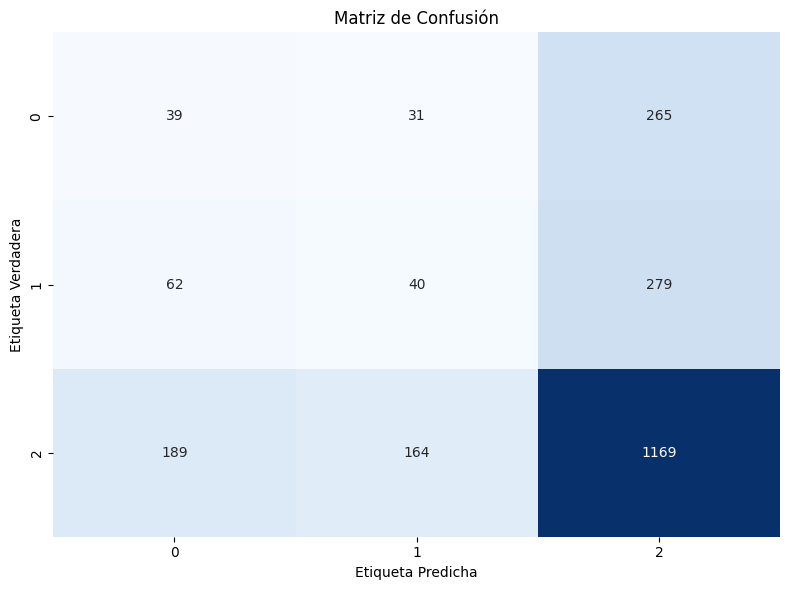

In [41]:

#  etiquetas verdaderas y predichas para el conjunto de datos de prueba
y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

#  matriz de confusión
confusion = confusion_matrix(y_true, y_pred)

# figura y un eje de subtrama
fig, ax = plt.subplots(figsize=(8, 6))


sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)


ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')
ax.set_title('Matriz de Confusión')


plt.tight_layout()


plt.show()

La presición del modelo se ve afectada por la disparidad de datos en las clases. Para los comentarios positivos tienen mayor precisión debido a que representan el 68% de los datos, mientras las otras clases pierden exactitud.

In [42]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Obtén las etiquetas verdaderas y predichas para el conjunto de datos de prueba
y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcula la precisión, el recall y el F1-score para cada clase
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# Imprime los valores de precisión, recall y F1-score para cada clase
for i in range(len(precision)):
    print(f'Clase {i}:')
    print(f'Precisión: {precision[i]}')
    print(f'Recall: {recall[i]}')
    print(f'F1-score: {f1[i]}')
    print()

22/22 [==============================] - 4s 202ms/step
Clase 0:
Precisión: 0.16896551724137931
Recall: 0.14626865671641792
F1-score: 0.15680000000000002

Clase 1:
Precisión: 0.11914893617021277
Recall: 0.07349081364829396
F1-score: 0.09090909090909091

Clase 2:
Precisión: 0.6760070052539404
Recall: 0.7608409986859396
F1-score: 0.7159196290571871



In [43]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Obtén las etiquetas verdaderas y predichas para el conjunto de datos de prueba
y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcula la precisión, recall y F1-score para el modelo en general
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Imprime los valores de precisión, recall y F1-score para el modelo en general
print(f'Precisión (modelo en general): {precision}')
print(f'Recall (modelo en general): {recall}')
print(f'F1-score (modelo en general): {f1}')

22/22 [==============================] - 4s 172ms/step
Precisión (modelo en general): 0.5103010117463466
Recall (modelo en general): 0.5567470956210903
F1-score (modelo en general): 0.5306700710369572
